Instructions:
1. Split data: train - validate - test (point: 10)
2. Draw correlation plot on training data and perform feature selection on highly correlated features (point: 10)
3. Fit models on training data (lambdas = [0.01, 0.1, 1, 10]) (point:50)
    a. Ridge regression (point: 25)
    b. LASSO (point: 25)
4. Choose the best lambda from the validation set (point: 20)
    a. Use RMSE as metric
    b. Interpret a sample of the coefficients of the best model
        i. Ridge regression
        ii. LASSO
5. Evaluate the best models on the test data (+ interpretation) (point: 10)
    a. MAE

    b. MAPE
    c. RMSE 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('boston.csv')

In [ ]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


# Split data: train - validate - test

In [ ]:
# split train test
from sklearn.model_selection import train_test_split

feature = df.drop(columns='medv')
target = df[['medv']]
feature_df_pretrain, feature_df_test, target_df_pretrain, target_df_test = train_test_split(feature, target, test_size=0.20, random_state=42)

feature_df_train, feature_df_validation, target_df_train, target_df_validation = train_test_split(feature_df_pretrain, target_df_pretrain, test_size=0.20, random_state=42)

#Draw correlation plot on training data and perform feature selection on highly correlated features

In [ ]:
# calulcate vif scores
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(feature_df_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,feature,vif_score
1,crim,1.750939
2,zn,2.473421
3,indus,3.741988
4,chas,1.110042
5,nox,4.585650
6,rm,1.972174
7,age,3.127443
8,dis,4.390458
9,rad,7.182410
10,tax,8.268145


nox, dis, rad, tax columns show multicollinearity

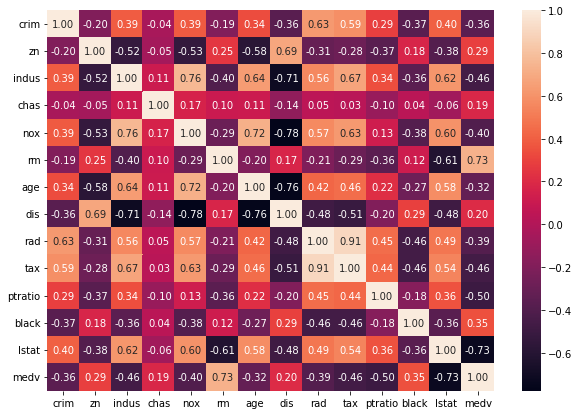

In [ ]:
# heatmap correlation
df_train = pd.concat([feature_df_train, target_df_train], axis=1)
corr = df_train.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

tax and rad are highly correlated, so we need to drop them

In [ ]:
feature_df_train = feature_df_train.drop(columns=['tax','rad']) 
feature_df_test = feature_df_test.drop(columns=['tax','rad'])
feature_df_validation = feature_df_validation.drop(columns=['tax','rad'])

In [ ]:
#recheck VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(feature_df_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,feature,vif_score
1,crim,1.404723
2,zn,2.253252
3,indus,3.214656
4,chas,1.097597
5,nox,4.118454
6,rm,1.908463
7,age,3.085304
8,dis,4.382486
9,ptratio,1.526414
10,black,1.323257


# Fit models on training data (lambdas = [0.01, 0.1, 1, 10]) and Choose the best lambda from the validation set

## A. Ridge

In [ ]:
from sklearn.linear_model import Ridge

# train the model
X_df_train = feature_df_train.to_numpy()
y_df_train = target_df_train.to_numpy()
y_df_train = y_df_train.reshape(len(y_df_train),)

# define the model
ridge_reg_pointzeroone = Ridge(alpha=0.01, random_state=42)
ridge_reg_pointone = Ridge(alpha=0.1, random_state=42)
ridge_reg_one = Ridge(alpha=1, random_state=42)
ridge_reg_ten = Ridge(alpha=10, random_state=42)

# fit the model (training)
ridge_reg_pointzeroone.fit(X_df_train, y_df_train)
ridge_reg_pointone.fit(X_df_train, y_df_train)
ridge_reg_one.fit(X_df_train, y_df_train)
ridge_reg_ten.fit(X_df_train, y_df_train)

Ridge(alpha=10, random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error

X_df_validation = feature_df_validation.to_numpy()
y_df_validation = target_df_validation.to_numpy()
y_df_validation = y_df_validation.reshape(len(y_df_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [ridge_reg_pointzeroone,
          ridge_reg_pointone,
          ridge_reg_one,
          ridge_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_df_validation)
    rmse = np.sqrt(mean_squared_error(y_df_validation,y_predict_validation))
    print(f'RMSE of Ridge regression model with alpha = {alpha} is {rmse}')

RMSE of Ridge regression model with alpha = 0.01 is 4.962234082671707
RMSE of Ridge regression model with alpha = 0.1 is 4.950661805765886
RMSE of Ridge regression model with alpha = 1.0 is 4.909045042614708
RMSE of Ridge regression model with alpha = 10 is 4.867167076950583


lambda 10 yang terbaik karena nilai RMSE nya paling kecil

In [ ]:
#Model Evaluation
ridge_best = ridge_reg_pointzeroone

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_df_train.columns.tolist(),
    'coefficient':[ridge_best.intercept_] + list(ridge_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,22.415564
1,crim,-0.073157
2,zn,0.026909
3,indus,-0.000813
4,chas,3.288124
5,nox,-17.308840
6,rm,5.180654
7,age,-0.005276
8,dis,-1.509390
9,ptratio,-0.847288


medv = 22.41 - 0.07 crim + 0.027 zn - 0.0008 indus + 3.28 chas - 17.31 + .....

Interpretation: 
- Kenaikan 1 point zn(residential land zoned proportion), saat feature yang lainnya tetap, maka terjadi kenaikan sebanyak 0.027 poin pada house pricing atau medv
- Nilai medv = 22.41 jika feature yang lain bernilai 0

## B. LASSO

In [ ]:
from sklearn.linear_model import Lasso

# train the model
X_df_train = feature_df_train.to_numpy()
y_df_train = target_df_train.to_numpy()
y_df_train = y_df_train.reshape(len(y_df_train),)

# define the model
lasso_reg_pointzeroone = Lasso(alpha=0.01, random_state=42)
lasso_reg_pointone = Lasso(alpha=0.1, random_state=42)
lasso_reg_one = Lasso(alpha=1, random_state=42)
lasso_reg_ten = Lasso(alpha=10, random_state=42)

# fit the model (training)
lasso_reg_pointzeroone.fit(X_df_train, y_df_train)
lasso_reg_pointone.fit(X_df_train, y_df_train)
lasso_reg_one.fit(X_df_train, y_df_train)
lasso_reg_ten.fit(X_df_train, y_df_train)

Lasso(alpha=10, random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error

X_df_validation = feature_df_validation.to_numpy()
y_df_validation = target_df_validation.to_numpy()
y_df_validation = y_df_validation.reshape(len(y_df_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [lasso_reg_pointzeroone,
          lasso_reg_pointone,
          lasso_reg_one,
          lasso_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_df_validation)
    rmse = np.sqrt(mean_squared_error(y_df_validation,y_predict_validation))
    print(f'RMSE of Lasso regression model with alpha = {alpha} is {rmse}')

RMSE of Lasso regression model with alpha = 0.01 is 4.934493563284168
RMSE of Lasso regression model with alpha = 0.1 is 4.904075071284979
RMSE of Lasso regression model with alpha = 1.0 is 4.845769009470302
RMSE of Lasso regression model with alpha = 10 is 5.4366365235863565


In [ ]:
#Model Evaluation
lasso_best = lasso_reg_ten

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_df_train.columns.tolist(),
    'coefficient':[lasso_best.intercept_] + list(lasso_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,26.087253
1,crim,-0.000000
2,zn,0.008032
3,indus,-0.000000
4,chas,0.000000
5,nox,-0.000000
6,rm,0.000000
7,age,0.000382
8,dis,-0.000000
9,ptratio,-0.000000


medv = 26.08 + 0.008 zn + 0.0004 age + 0.015 black - 0.69 lstat

Interpreation:
- feature crim, indus, chas, nox, rm, dis, dan ptratio tereduksi karena memiliki coeff 0
- setiap kenaikan 1 point pada black sama dengan kenaikan 0.015 point pada medv

# Evaluate the best models on the test data (+ interpretation)

In [ ]:
# prepare prediction result on test data
X_df_test = feature_df_test.to_numpy()
y_predict_test = ridge_best.predict(X_df_test)

# ground truth target
y_df_test = target_df_test.to_numpy()
y_df_test = y_df_test.reshape(len(y_df_test),)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_df_test, y_predict_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_df_test, y_predict_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_df_test, y_predict_test)))

RMSE for testing data is 5.1947335125835306
MAE for testing data is 3.350384770976842
MAPE for testing data is 0.1810663686394597


Interpretasi:
1. RMSE
Standar deviasi dari prediction error adalah 5.19 atau sebagian besar residual terdeviasi antara +- 5.19
2. MAE
Secara rata-rata, prediksi meleset sejauh 3.35 dari nilai medv sebenarnya
3. MAPE
sehingga 3.35 sama dengan 18% penyimpangan dari nilai medv